#    Market_Segmentation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
url ="https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv"
data=pd.read_csv(url)
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


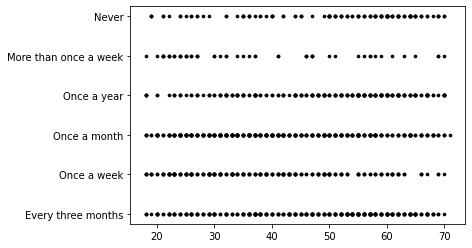

In [4]:
f1 = data['Age'].values
f2 = data['VisitFrequency'].values

X = np.array(list(zip(f1,f2)))
plt.scatter(f1,f2 ,c='black',s=7)

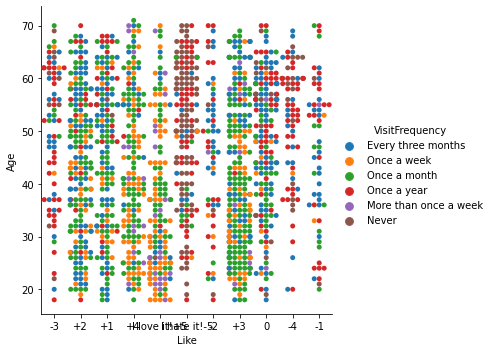

In [9]:
sns.catplot(x="Like", y="Age", hue="VisitFrequency", kind="swarm", data=data)

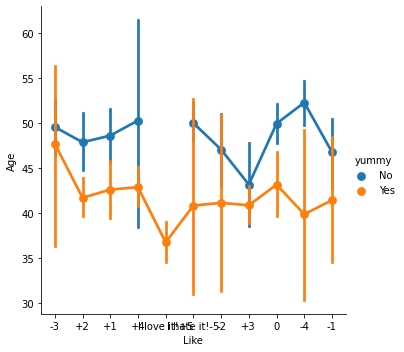

In [11]:
sns.catplot(x="Like", y="Age", hue="yummy", kind="point", data=data)

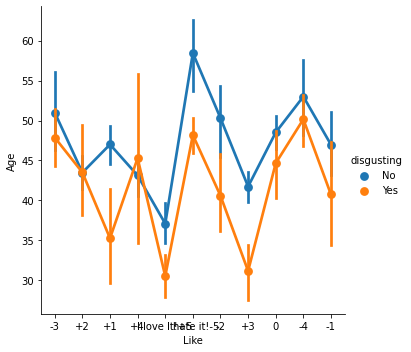

In [12]:
sns.catplot(x="Like", y="Age", hue="disgusting", kind="point", data=data)

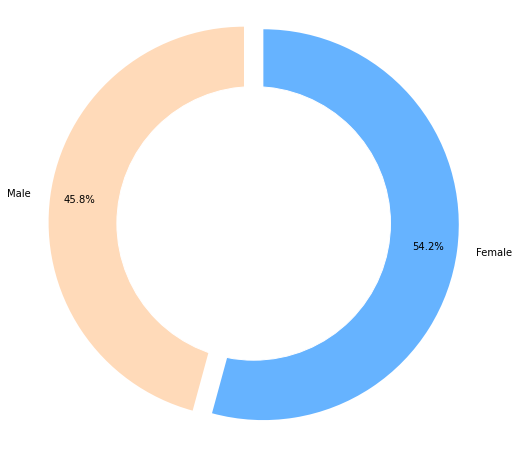

In [13]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

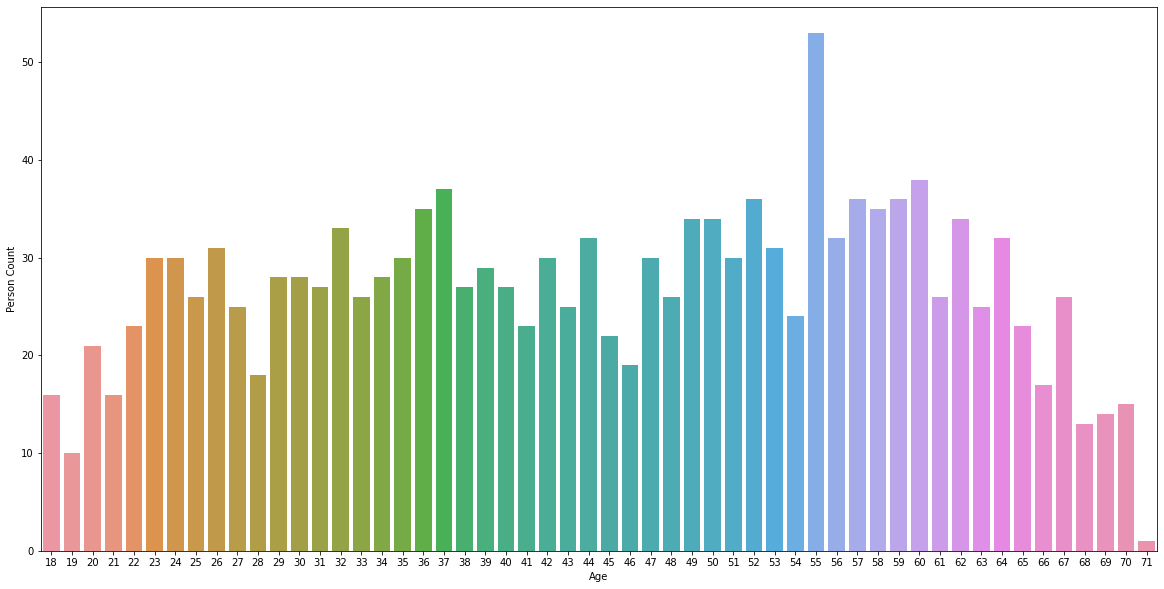

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

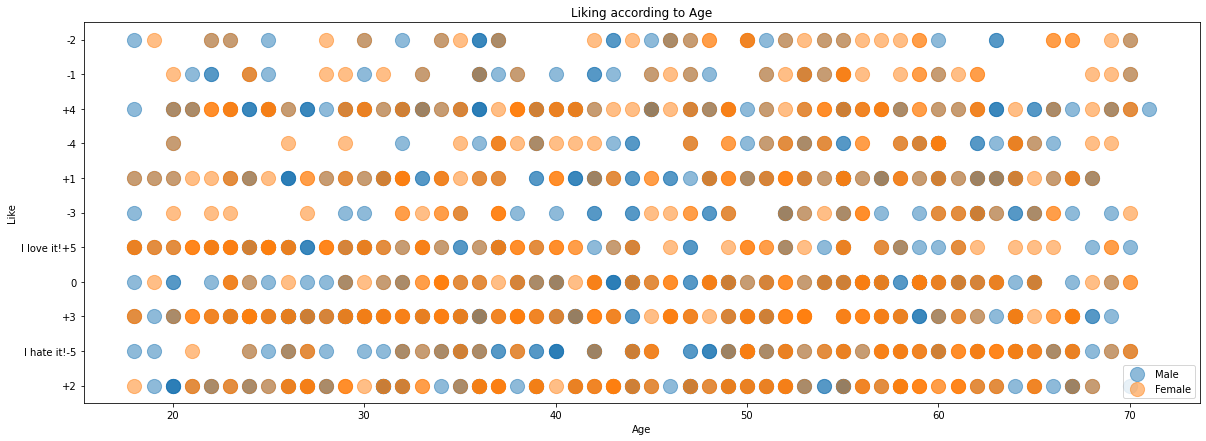

In [15]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Like', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Like")
plt.title("Liking according to Age")
plt.show()

In [18]:
merg = linkage(data,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

ValueError: could not convert string to float: 'No'

In [16]:
data['Age'] = data['Age'].astype(str)

In [17]:
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age               object
VisitFrequency    object
Gender            object
dtype: object

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8511.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8511.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8511.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8511.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8511.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 150, cost: 6987.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 326, cost: 7017.0
Run 2, iteration: 2/100, moves: 15, cost: 7017.0
Init: initializing centroids


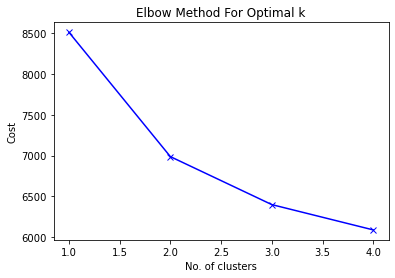

In [22]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 331, cost: 6850.0
Run 1, iteration: 2/100, moves: 12, cost: 6850.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 212, cost: 6772.0
Run 2, iteration: 2/100, moves: 5, cost: 6772.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 61, cost: 7092.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 258, cost: 6635.0
Run 4, iteration: 2/100, moves: 127, cost: 6624.0
Run 4, iteration: 3/100, moves: 6, cost: 6624.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 431, cost: 6680.0
Run 5, iteration: 2/100, moves: 98, cost: 6680.0
Best run was number 4


array([2, 2, 0, ..., 1, 1, 0], dtype=uint16)

In [24]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,2,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,0,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,1,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,2,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,1,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,1,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
